## Importing Required Libraries

In [8]:
# from pandas_profiling import ProfileReport

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
import warnings
warnings.filterwarnings("ignore")

## Data Cleaning

### Reading Input Data

In [11]:
loan_df = pd.read_csv('loan.csv',low_memory=False)

In [12]:
loan_df.shape



(39717, 111)

In [13]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


 Observation : We have more than hundred features. To filter out unwanted features, we will perform feature selection.

### Handling Columns with Missing Values

In [14]:
columns_count_null = loan_df.isna().sum().reset_index()

In [15]:
columns_count_null['percentage']=columns_count_null[0]/loan_df.shape[0]*100

In [16]:
columns_count_null.tail()

,index,0,percentage
106,tax_liens,39,0.098195
107,tot_hi_cred_lim,39717,100.000000
108,total_bal_ex_mort,39717,100.000000
109,total_bc_limit,39717,100.000000
110,total_il_high_credit_limit,39717,100.000000


Removing features which has more than 10% null values

In [17]:
columns_to_take = columns_count_null[columns_count_null['percentage']<10]['index'].tolist()

In [18]:
len(columns_to_take)

53

Defining important features list based on our domain understanding
Loan Application being fully paid or charged off will mostly be affected by user related features.

In [19]:
loan_df_not_null = loan_df[columns_to_take]

In [20]:
loan_df_not_null.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Checking for Duplicate rows

In [21]:
loan_df_not_null.shape

(39717, 53)

In [22]:
loan_df_not_null.drop_duplicates(inplace=True)

In [23]:
loan_df_not_null.shape

(39717, 53)

There are no duplicates in the dataset

### More on Handling missing values

In [24]:
loan_df_not_null.isna().sum()[loan_df_not_null.isna().sum()>0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

Lets check the type of each column in the data

In [25]:
loan_df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Dropping non-variant columns

In [26]:
print("columns where len of unique values is 1, hence deleted")
for i in columns_to_take:
    if loan_df_not_null[i].nunique()==1:
        print(i)
        del loan_df_not_null[i]

columns where len of unique values is 1, hence deleted
pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


### Removing customer behaviour Feature which will not be available at the time of application.

In [27]:
## Remove Customer behaviour features
customer_behaviour_features = ['delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal',  'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']

In [28]:
loan_df_not_null = loan_df_not_null.drop(customer_behaviour_features, axis=1)

#### Derived features

In [29]:
loan_df_not_null.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'revol_util', 'out_prncp',
       'out_prncp_inv', 'pub_rec_bankruptcies'],
      dtype='object')

In [30]:
loan_df_not_null['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

Extracting month & year from issue date.

In [31]:
loan_df_not_null['year'] = pd.to_datetime(loan_df_not_null['issue_d'], format='%b-%y').dt.strftime('%Y')

In [32]:
loan_df_not_null['month'] = pd.to_datetime(loan_df_not_null['issue_d'], format='%b-%y').dt.strftime('%m')

In [33]:
def update_year(x):
    """Add prefic to two digit year mentoned in earliest credit lline variable."""
    if x>11:
        return '19'+str(x)
    else:
        return '200'+str(x)

Extracting month year from first credit line of a member.

In [34]:
loan_df_not_null['year_cr_line'] = loan_df_not_null['earliest_cr_line'].apply(lambda x: int(x.split('-')[-1]))
loan_df_not_null['month_cr_line'] = loan_df_not_null['earliest_cr_line'].apply(lambda x: x.split('-')[0])


In [35]:
loan_df_not_null['year_cr_line'] = loan_df_not_null['year_cr_line'].apply(update_year)

Calculating number of years passed since a member initiated first loan, which can be used to analyze customer behavoiur in past.

In [36]:
loan_df_not_null['year_diff_cr_line'] = loan_df_not_null['year'].astype(int) - loan_df_not_null['year_cr_line'].astype(int)

In [37]:
loan_df_not_null[['year', 'year_cr_line', 'year_diff_cr_line']].sort_values(['year_diff_cr_line'])

,year,year_cr_line,year_diff_cr_line
25511,2010,2007,3
24440,2010,2007,3
24465,2010,2007,3
24493,2010,2007,3
6887,2011,2008,3
...,...,...,...
13975,2011,1956,55
22031,2010,1954,56
6118,2011,1954,57
15269,2011,1950,61


In [38]:
loan_df_not_null['no_debt'] = loan_df_not_null.dti.apply(lambda x: "No debt" if x<=0 else "debt")

## Data Analysis

### Univariate Analysis

In [39]:
loan_df_not_null.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [40]:
loan_df_not_null.title.isna().sum()

11

In [41]:
loan_df_not_null.title.fillna("Not Known", inplace=True)

In [42]:
loan_df_not_null.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

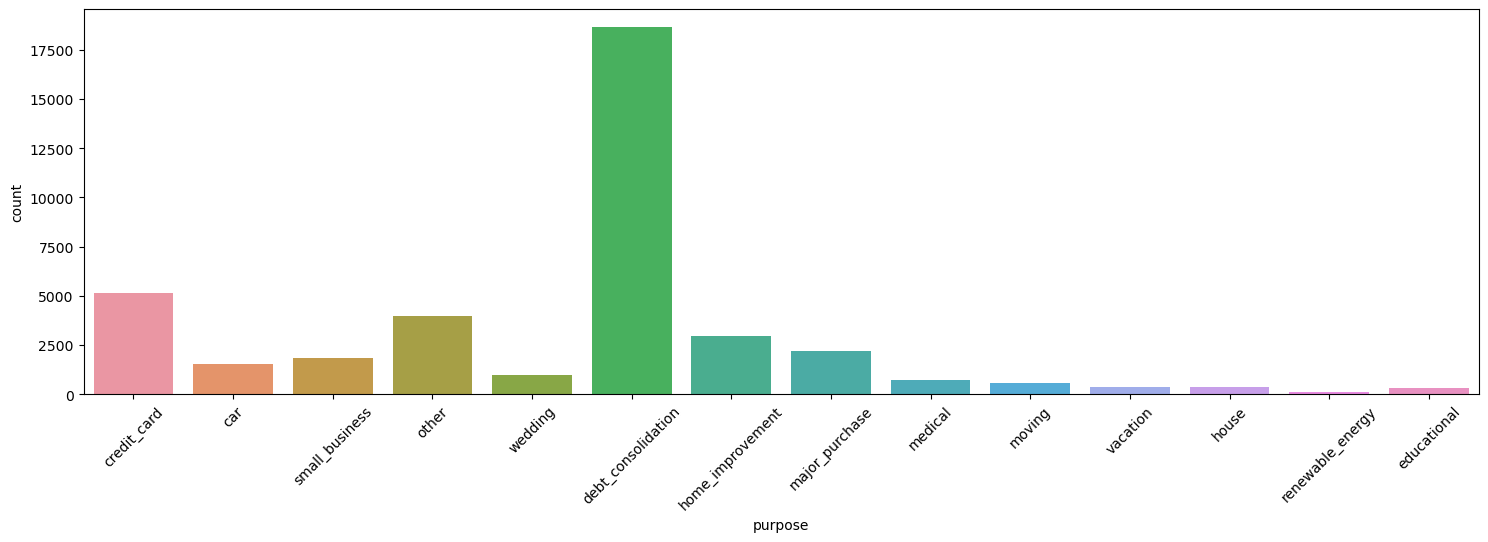

In [43]:
plt.figure(figsize=(18,5))
sns.countplot(data=loan_df_not_null, x='purpose')
plt.xticks(rotation=45)
plt.show()

Observation 1 - We have around 19k unique variables for title, and willl be tough to analyze. We noticed a similar feature with precise information on loan purpose, and hence will drop 'title'

Observation 2 - Most of the user apply for loan with the purpose of consolidatin their previous debt.

In [44]:
del loan_df_not_null['title']

In [45]:
for i in ['member_id', 'id', 'url']:
    print(loan_df_not_null[i].value_counts().unique())

[1]
[1]
[1]


'member_id', 'id', 'url' has unique values for each customer and will not be useful in Data Anaysis and hence dropping. 

In [46]:
loan_df_not_null.drop(['url', 'member_id', 'id'], axis=1, inplace=True)

In [47]:
loan_df_not_null.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

zip code is area specific ,and it has wider range so we are dropping it

In [48]:
del loan_df_not_null['zip_code']

### Checking loan_status distribution

In [49]:
loan_df_not_null['loan_status'].value_counts(normalize = True)

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

only taking "Fully Paid" and "Charged Off" data points

In [50]:

loan_df_not_null=loan_df_not_null[loan_df_not_null['loan_status']!='Current']

<Axes: xlabel='loan_status', ylabel='count'>

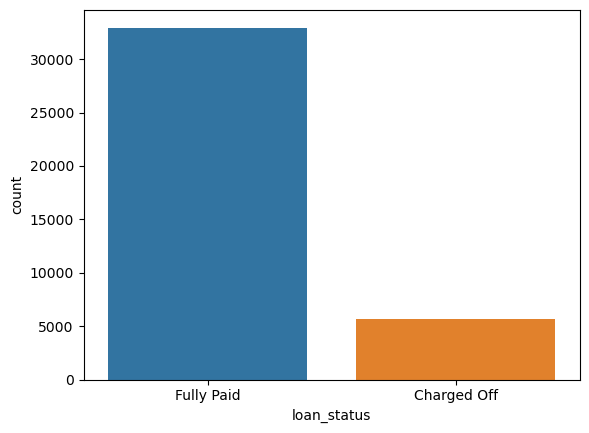

In [51]:
sns.countplot(data=loan_df_not_null, x='loan_status')

Observation : Around 83% of users generally pay their debt.

#### State

In [52]:
loan_df_not_null.addr_state.value_counts().head()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
Name: addr_state, dtype: int64

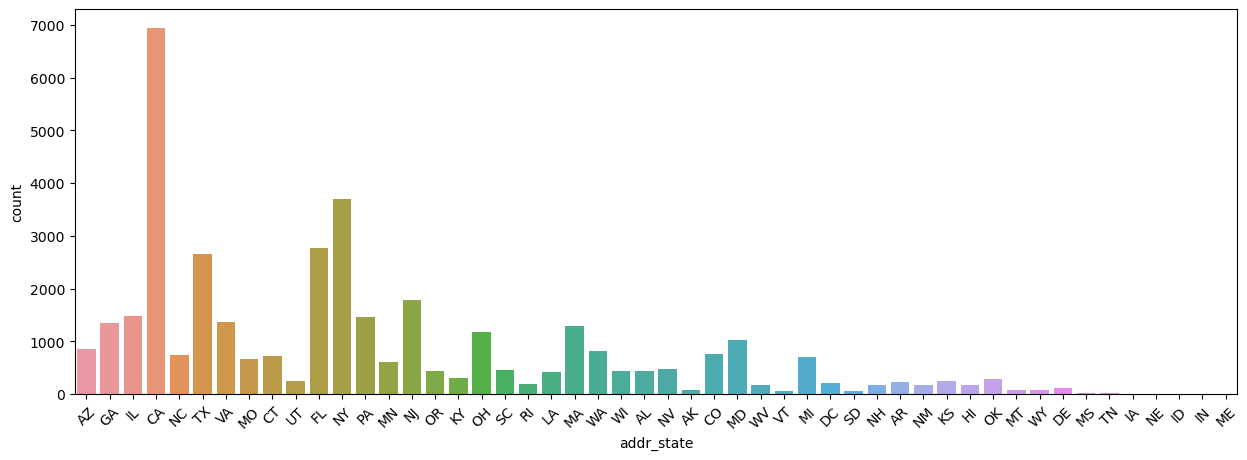

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(data=loan_df_not_null, x='addr_state')
plt.xticks(rotation=45)
plt.show()

Observation - Most of the loan application for LC comes from CA, NY, FL & TX

#### DTI - Monthly loan paid/monthly income

In [54]:
loan_df_not_null.dti.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

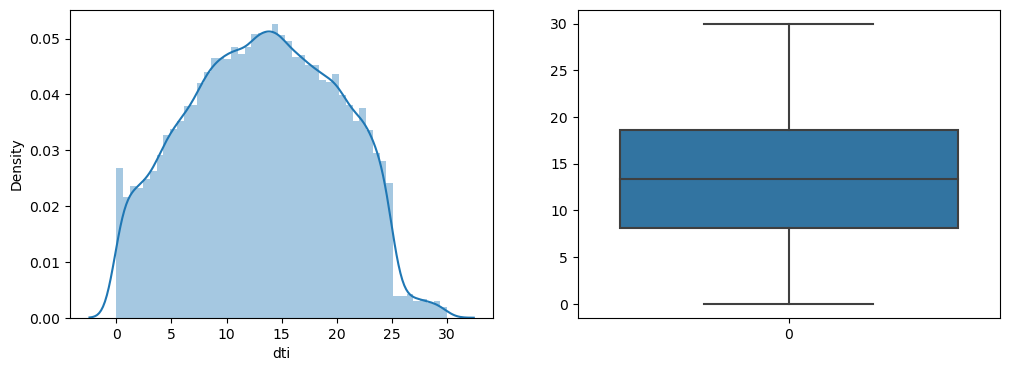

In [55]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df_not_null.dti)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df_not_null.dti)
plt.show()


Obsevation - All the applicants have dti < 30% which is good thing. Addition to that there is no outliers in dti.

#### Interest Rate

In [56]:
loan_df_not_null.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [57]:
# lets convert the type of int_rate column from string to float type
loan_df_not_null['int_rate']=loan_df_not_null['int_rate'].apply(lambda x: float(x[:-1]))

In [58]:
loan_df_not_null['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

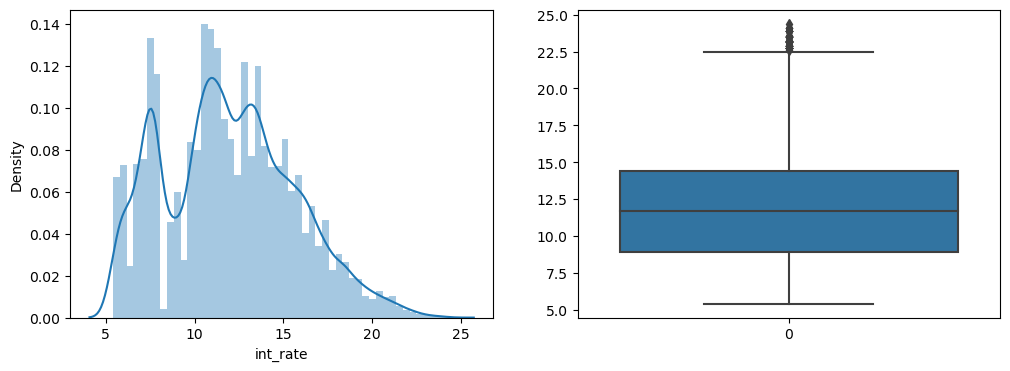

In [59]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df_not_null.int_rate)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df_not_null.int_rate)
plt.show()


Observation - Most applicant had to pay interest rate of 9-14%. Frequency distribution of interest rate is right skewed,few people took loan at higher rates of interest i.e., 17-22.5%

#### Grade

In [60]:
temp = loan_df_not_null.grade.value_counts().reset_index()

<Axes: xlabel='index', ylabel='grade'>

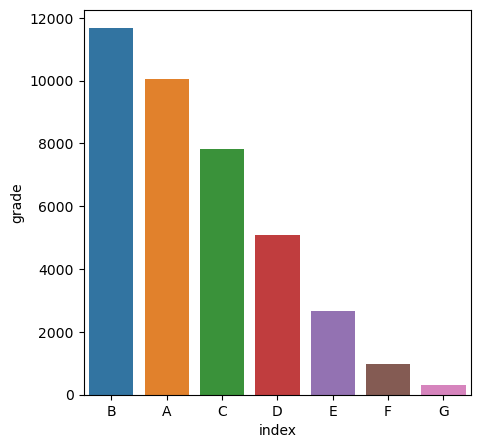

In [61]:
plt.figure(figsize=(5,5))
sns.color_palette("Set2")
sns.barplot(data=temp, x='index', y = 'grade')

Observation - Most of the loan application are from people of grade A B & C.

sub_grade

In [62]:
temp = loan_df_not_null.sub_grade.value_counts().reset_index()

<Axes: xlabel='index', ylabel='sub_grade'>

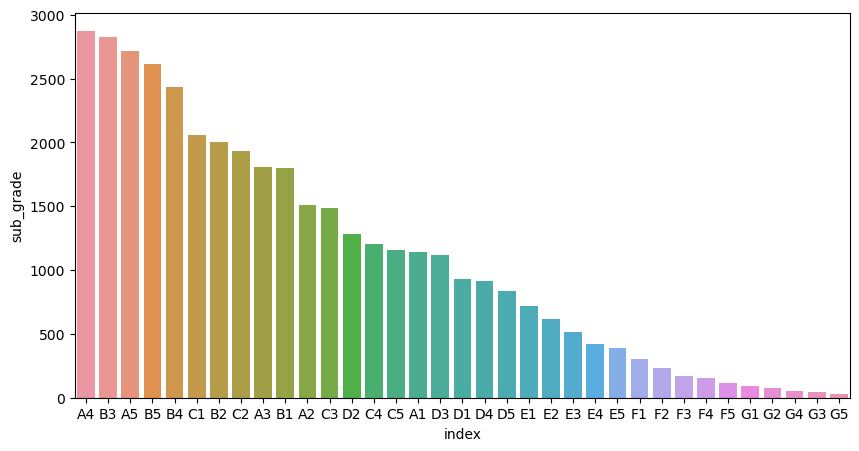

In [63]:
plt.figure(figsize=(10,5))
sns.color_palette("husl", 8)
sns.barplot(data=temp, x='index', y='sub_grade')

#### Employment Length

In [64]:
type(loan_df_not_null['emp_length'] [0])

str

In [65]:
loan_df_not_null['emp_length'].isna().sum()

1033

In [66]:
#Imputing null employment length with 0, assuming member with emp_length as null has < 1 year of experience.
loan_df_not_null.emp_length.fillna('0', inplace=True)

In [67]:
#Cleaning emp length variable
loan_df_not_null['emp_length']=loan_df_not_null['emp_length'].apply(lambda x: int(x.replace('+','').replace('<', '').strip().split()[0]))

In [68]:
temp = loan_df_not_null['emp_length'].value_counts().reset_index()

<Axes: xlabel='index', ylabel='emp_length'>

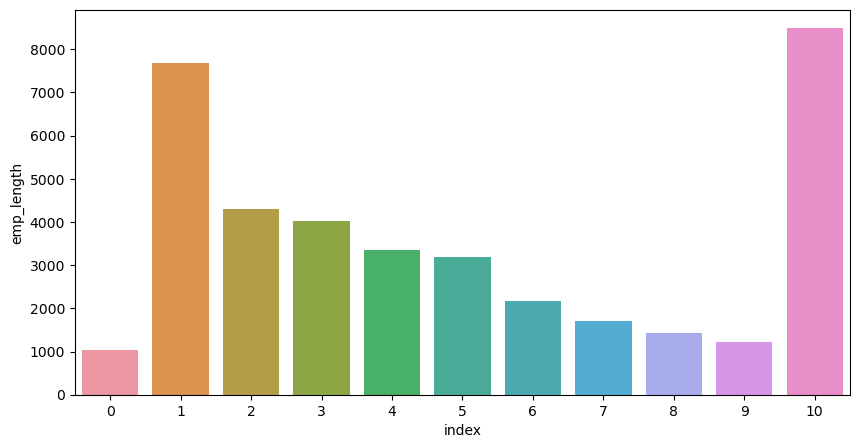

In [69]:
plt.figure(figsize=(10,5))
sns.color_palette("husl", 8)
sns.barplot(data=temp, x='index', y = 'emp_length')

Observation - Most loan application are either from someone starting their carrer or someone having 10+ years of experience

#### Home ownership

In [70]:
loan_df_not_null['home_ownership'].value_counts(normalize= True)

RENT        0.479042
MORTGAGE    0.441221
OWN         0.077118
OTHER       0.002540
NONE        0.000078
Name: home_ownership, dtype: float64

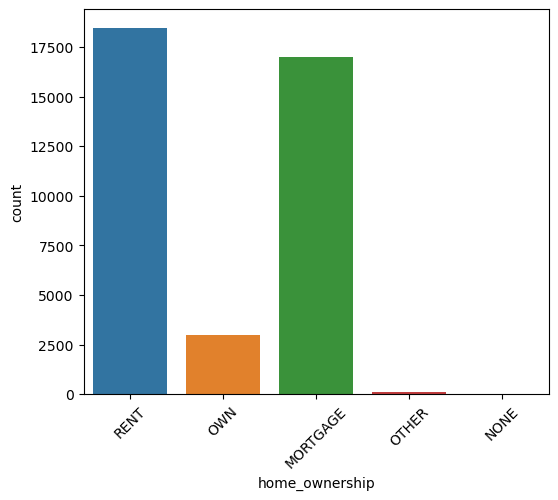

In [71]:
plt.figure(figsize=(6,5))
sns.color_palette("husl", 8)
sns.countplot(data=loan_df_not_null, x='home_ownership')
plt.xticks(rotation=45)
plt.show()

Observation - As we can see in the above plot people who own house are less likely to take loan

#### Annual Income

In [72]:
loan_df_not_null['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

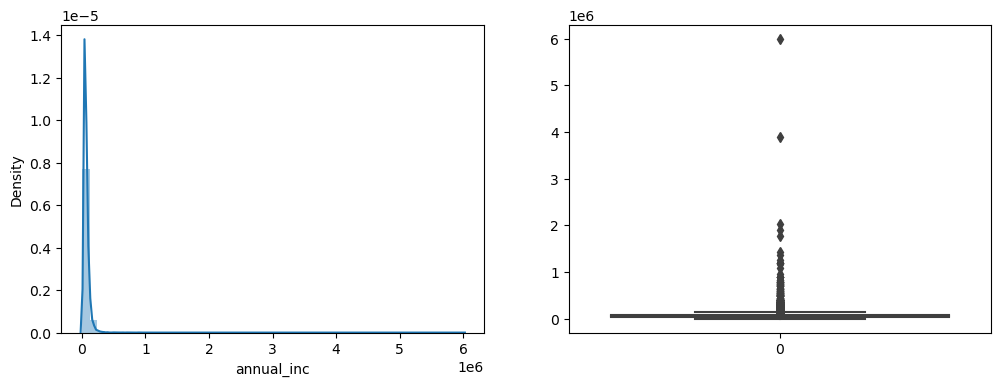

In [73]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df_not_null.annual_inc)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df_not_null.annual_inc)
plt.show()

We have outlier in annual income, which can hinder our EDA process. Hence we have to do outlier treatment on annual  income.

In [74]:
loan_df_not_null[loan_df_not_null['annual_inc']>2000000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,revol_util,out_prncp,out_prncp_inv,pub_rec_bankruptcies,year,month,year_cr_line,month_cr_line,year_diff_cr_line,no_debt
29639,25000,15500,11430.00082,60 months,10.62,334.08,B,B3,Lea Regional Hospital/Pecos Valley,3,...,10.20%,0.0,0.0,0.0,2010,06,1999,Sep,11,debt
30107,5000,5000,5000.00000,36 months,12.73,167.84,C,C1,post office,10,...,37.70%,0.0,0.0,0.0,2010,05,2001,Jan,9,debt
39089,8450,8450,3747.00000,36 months,12.29,281.84,C,C5,at&t wireless,1,...,51.80%,0.0,0.0,NaN,2008,03,2004,Aug,4,debt


In [75]:
X = loan_df_not_null['annual_inc'].value_counts().reset_index()

<Axes: xlabel='index', ylabel='annual_inc'>

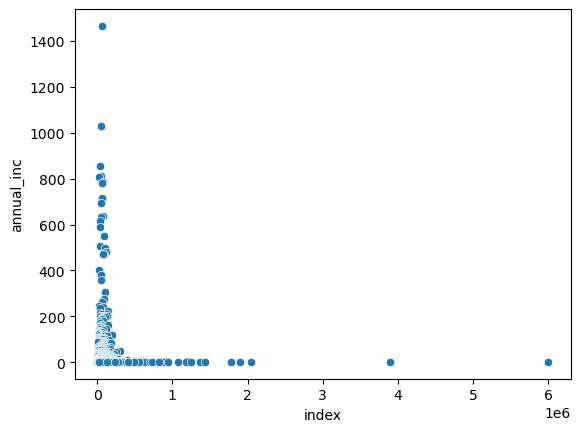

In [76]:
sns.color_palette("husl", 8)
sns.scatterplot(X, x='index', y='annual_inc')

In [77]:
# Outlier treatment
loan_df_not_null = loan_df_not_null[loan_df_not_null["annual_inc"] < loan_df_not_null["annual_inc"].quantile(0.99)]

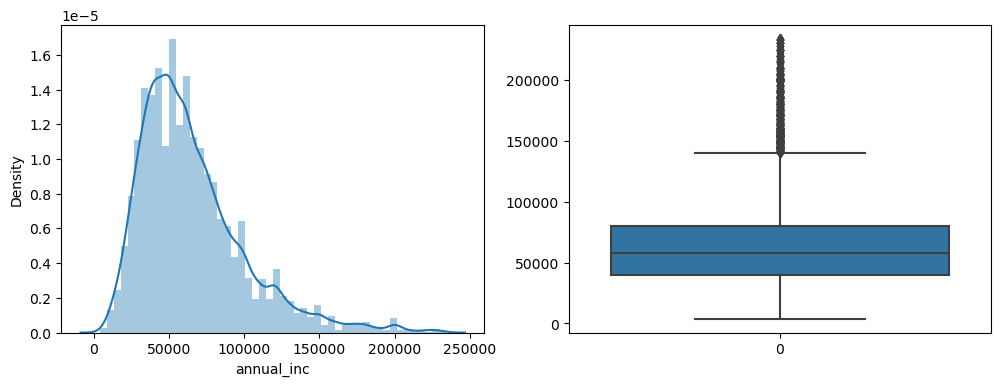

In [78]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df_not_null.annual_inc)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df_not_null.annual_inc)
plt.show()

Observation: Annual income is right skewed, which is true cause there are few people with higher salary range, Also there are few outliers.

#### Funded Amount

In [79]:
loan_df_not_null['funded_amnt'].describe()

count    38191.000000
mean     10703.329973
std       7011.076206
min        500.000000
25%       5100.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

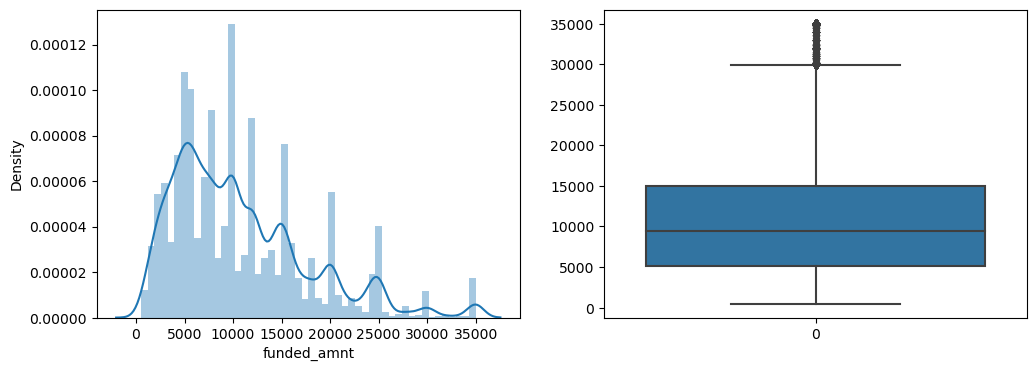

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df_not_null.funded_amnt)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df_not_null.funded_amnt)
plt.show()

In [81]:
loan_df_not_null['funded_amnt_inv'].describe()

count    38191.000000
mean     10146.556380
std       6943.535384
min          0.000000
25%       5000.000000
50%       8575.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

#### loan amount

In [82]:
loan_df_not_null['loan_amnt'].describe()

count    38191.000000
mean     10962.265979
std       7266.157660
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

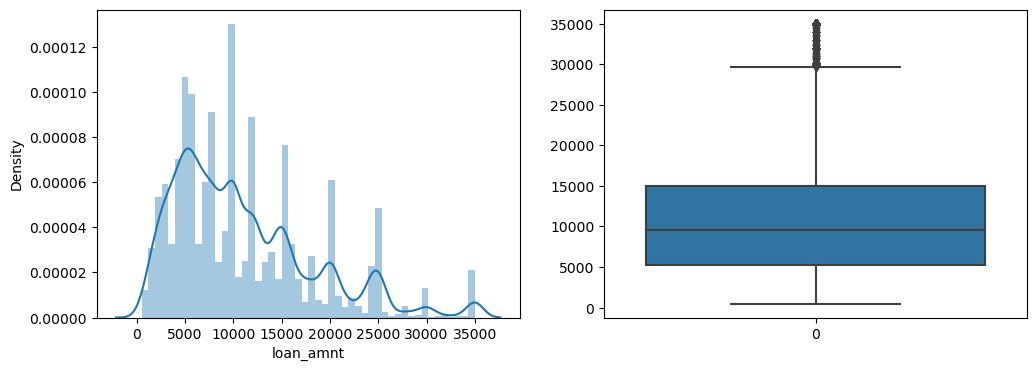

In [83]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df_not_null.loan_amnt)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df_not_null.loan_amnt)
plt.show()

#### Funded amount investment

In [84]:
loan_df_not_null['funded_amnt_inv'].describe()

count    38191.000000
mean     10146.556380
std       6943.535384
min          0.000000
25%       5000.000000
50%       8575.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

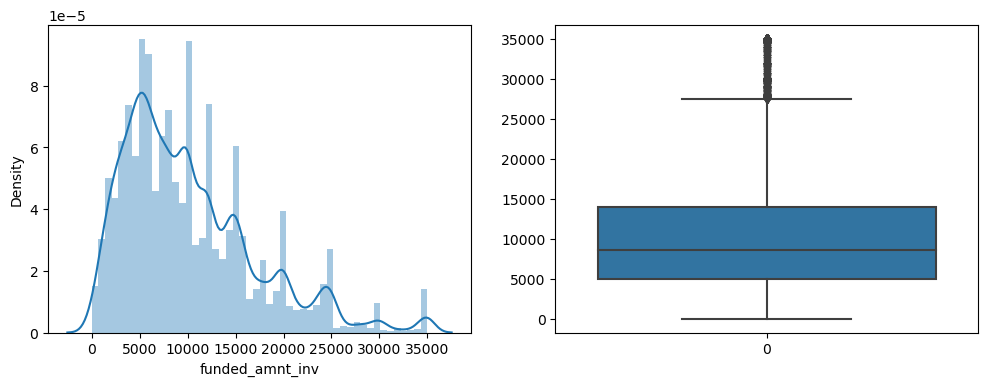

In [85]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df_not_null.funded_amnt_inv)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df_not_null.funded_amnt_inv)
plt.show()

Distribution for all three variable, 'loan_amnt', 'funded_amnt_inv', 'funded_amnt' seems identical, will check correlaion to confirm

In [86]:
loan_df_not_null[['loan_amnt', 'funded_amnt_inv', 'funded_amnt']].corr()

,loan_amnt,funded_amnt_inv,funded_amnt
loan_amnt,1.000000,0.937537,0.981815
funded_amnt_inv,0.937537,1.000000,0.955784
funded_amnt,0.981815,0.955784,1.000000


These 3 features are highly correlated, hence dropping.

In [87]:
loan_df_not_null.drop(['funded_amnt_inv', 'loan_amnt'], axis=1, inplace=True)

#### Term

In [88]:
loan_df_not_null.term.value_counts()

 36 months    28819
 60 months     9372
Name: term, dtype: int64

<Axes: xlabel='term', ylabel='count'>

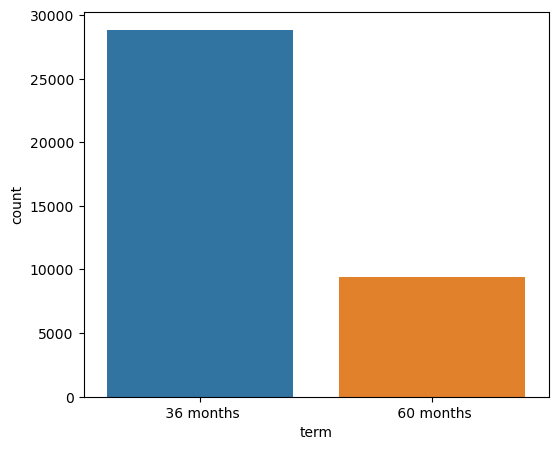

In [89]:
plt.figure(figsize=(6,5))
sns.color_palette("husl", 8)
sns.countplot(data=loan_df_not_null, x='term')

Observation - Most of the member opt for short term loan option i.e 36months.

#### Installment

In [90]:
loan_df_not_null.installment.describe()

count    38191.000000
mean       319.938941
std        205.948407
min         15.690000
25%        165.380000
50%        276.300000
75%        421.800000
max       1305.190000
Name: installment, dtype: float64

In [91]:
loan_df_not_null.installment.isna().sum()

0

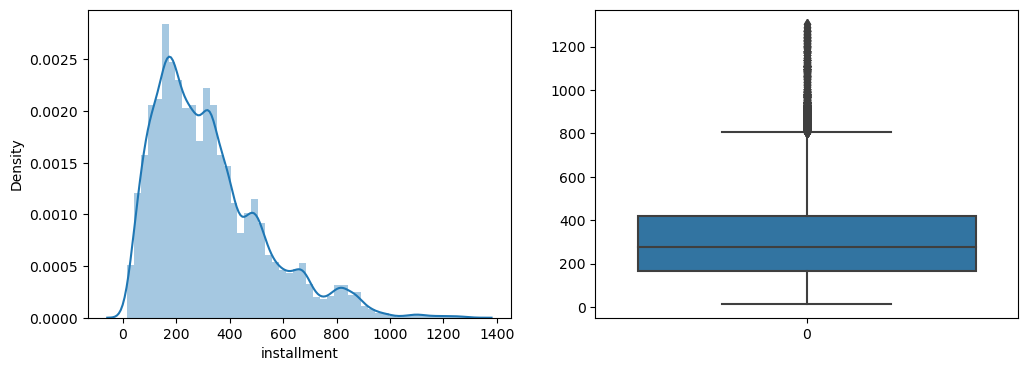

In [92]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df_not_null.installment)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df_not_null.installment)
plt.show()

Observation - Most loan application has installment amount in the range of 200-400.

#### Employee Title

In [93]:
loan_df_not_null.emp_title.value_counts()

US Army                                 131
Bank of America                         107
IBM                                      62
AT&T                                     57
Kaiser Permanente                        56
                                       ... 
Macy's East Inc.                          1
westin                                    1
New Mexico Department of Corrections      1
Sapa                                      1
Evergreen Center                          1
Name: emp_title, Length: 27793, dtype: int64

In [94]:
loan_df_not_null.emp_title.isna().sum()

2345

Analyzing variable with so many unique value wiil be difficult.

In [95]:
#Imputing null value with "Not known"
loan_df_not_null.emp_title.fillna('Not Known', inplace=True)

In [96]:
temp = loan_df_not_null.emp_title.value_counts().reset_index()

<Axes: xlabel='index', ylabel='emp_title'>

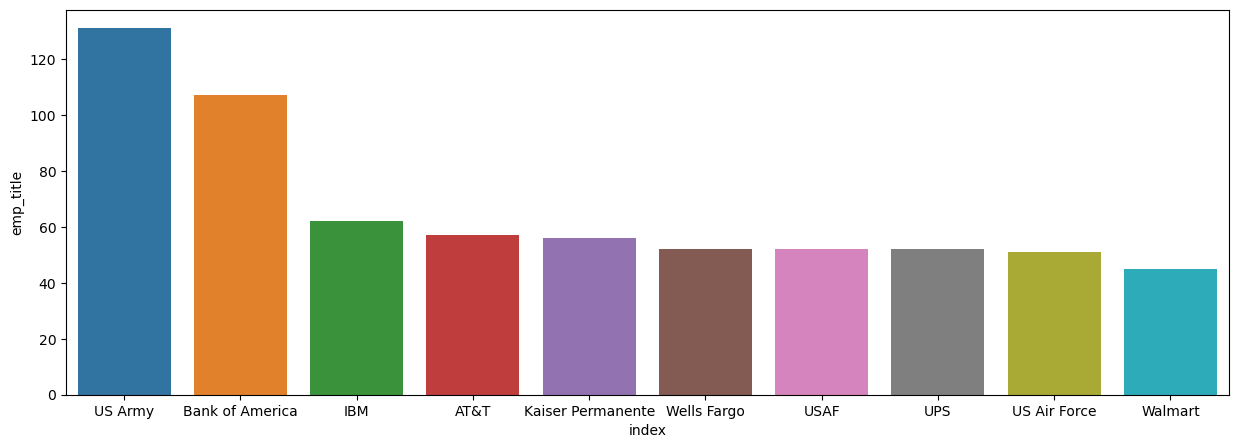

In [97]:
plt.figure(figsize=(15,5))
sns.color_palette("husl", 8)
sns.barplot(data=temp[(temp['index']!='Not Known')].iloc[:10,:], x='index', y='emp_title' )

Observation - USARMY & BOA employee has applied for loan more than any other company.

#### Verification Status

In [98]:
loan_df_not_null.verification_status.value_counts()

Not Verified       16604
Verified           12031
Source Verified     9556
Name: verification_status, dtype: int64

<Axes: xlabel='verification_status', ylabel='count'>

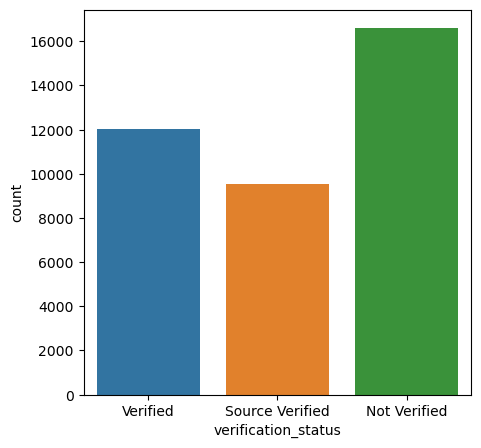

In [99]:
plt.figure(figsize=(5,5))
sns.color_palette("husl", 8)
sns.countplot(data=loan_df_not_null, x='verification_status')

Observation: Most of the borrower's annual income was not verified by LC

#### Loan Issue Date

<Axes: xlabel='year', ylabel='count'>

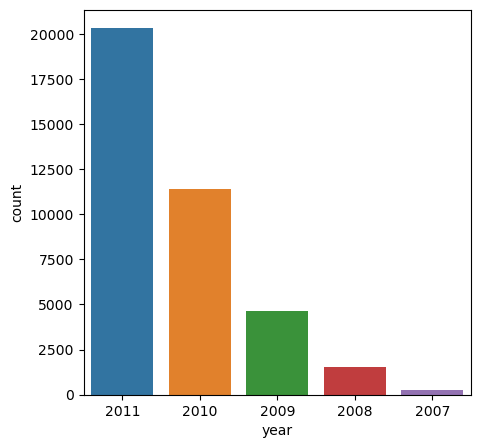

In [100]:
plt.figure(figsize=(5,5))
sns.color_palette("husl", 8)
sns.countplot(data=loan_df_not_null, x='year')

<Axes: xlabel='month', ylabel='count'>

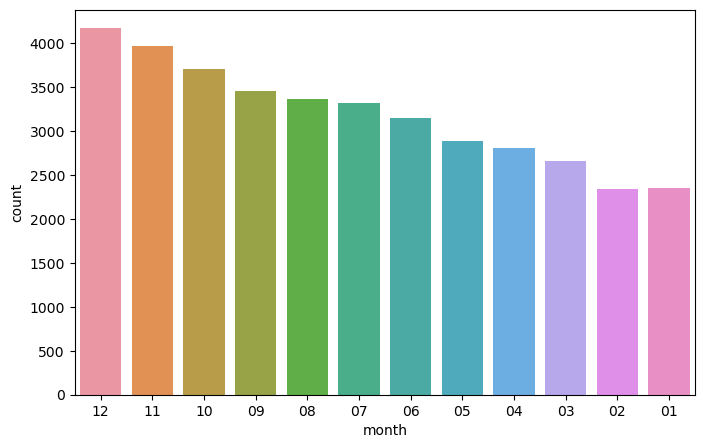

In [101]:
plt.figure(figsize=(8,5))
sns.color_palette("husl", 8)
sns.countplot(data=loan_df_not_null, x='month')

Observation:
From 2007 to 2011 there is exponential increase in borrowers.
Most people take loan towards year end, (maybe for vactions)

####  earliest_cr_line 

In [102]:
temp=loan_df_not_null.year_cr_line.value_counts().reset_index().sort_values(['index'])

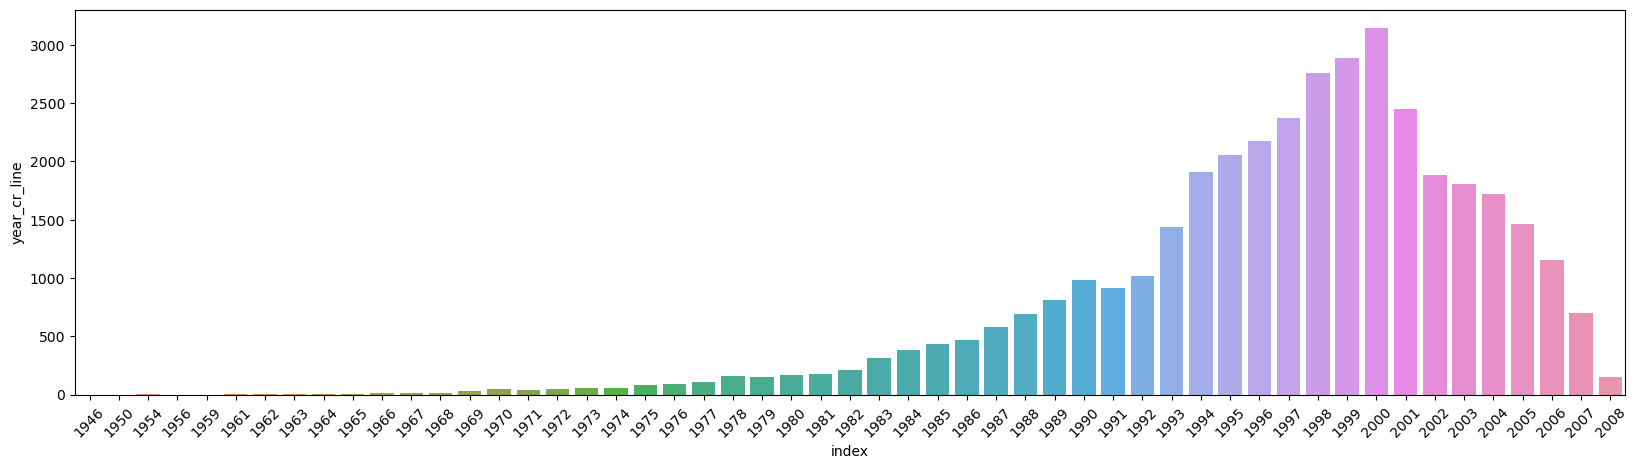

In [103]:
plt.figure(figsize=(20,5))
sns.color_palette("husl", 8)
sns.barplot(data=temp, x='index', y='year_cr_line')
plt.xticks(rotation=45)
plt.show()

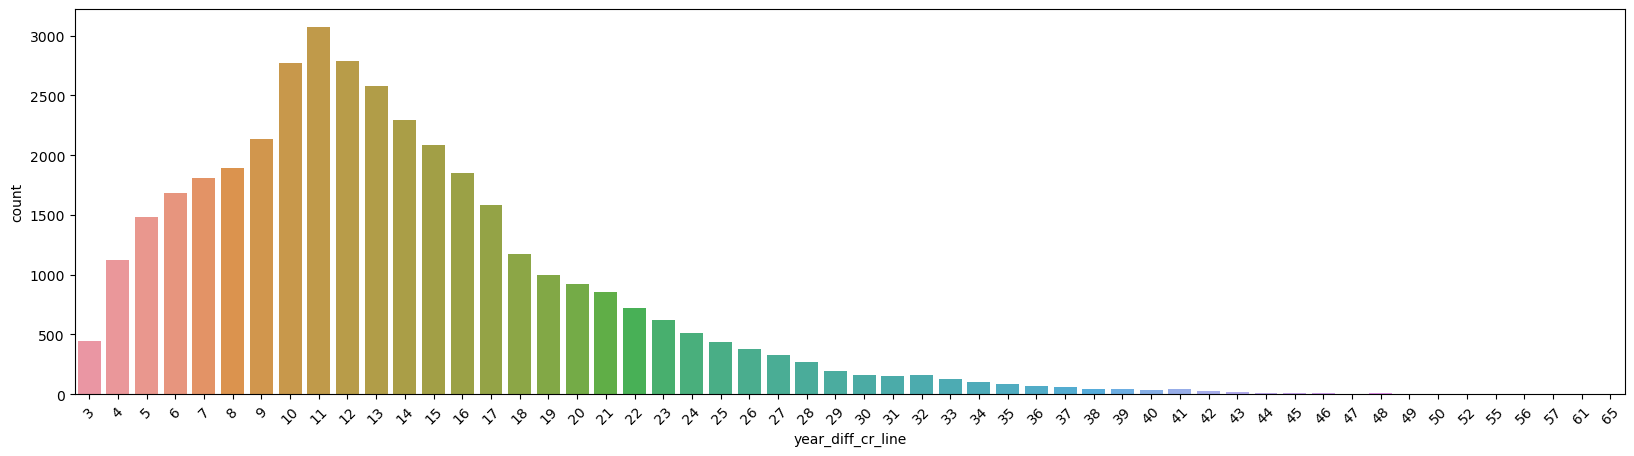

In [104]:
plt.figure(figsize=(20,5))
sns.color_palette("husl", 8)
sns.countplot(data=loan_df_not_null, x='year_diff_cr_line')
plt.xticks(rotation=45)
plt.show()

In [105]:
loan_df_not_null.year_diff_cr_line.mean()

13.66041737582153

Observation: 
1. Most of the customers have started taking loan from late 80s.
2. People take loan on avg after 13 years.

#### Revol Uti

In [106]:
loan_df_not_null['revol_util'].value_counts()

0%        934
63%        62
0.20%      62
40.70%     57
66.70%     56
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [107]:
loan_df_not_null.revol_util.isna().sum()

49

In [108]:
loan_df_not_null.revol_util.fillna('0%', inplace=True)

In [109]:
loan_df_not_null['revol_util'] = loan_df_not_null['revol_util'].apply(lambda x: float(x.replace('%', '')))

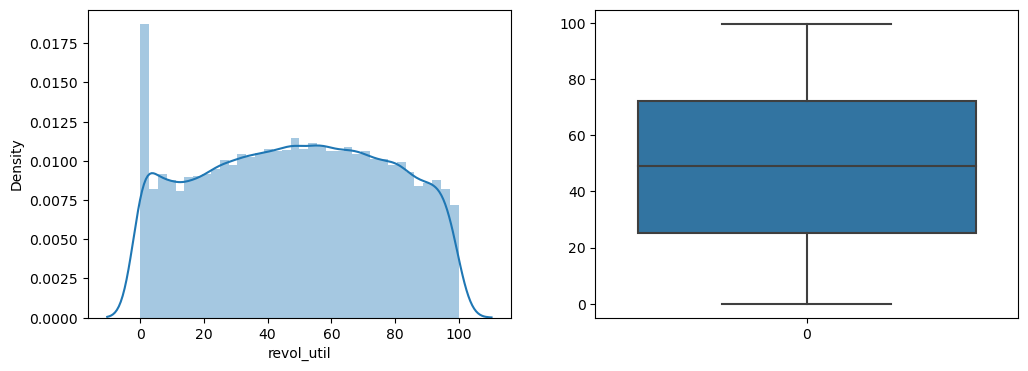

In [110]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df_not_null.revol_util)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df_not_null.revol_util)
plt.show()

Observation - Most of the member have 40-60% of credit limit consumed.

#### Public Bankruptcy record

In [111]:
loan_df_not_null['pub_rec_bankruptcies'].value_counts()

0.0    35865
1.0     1633
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [112]:
loan_df_not_null['pub_rec_bankruptcies'].isna().sum()

688

In [113]:
loan_df_not_null['pub_rec_bankruptcies'].fillna(0, inplace=True)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

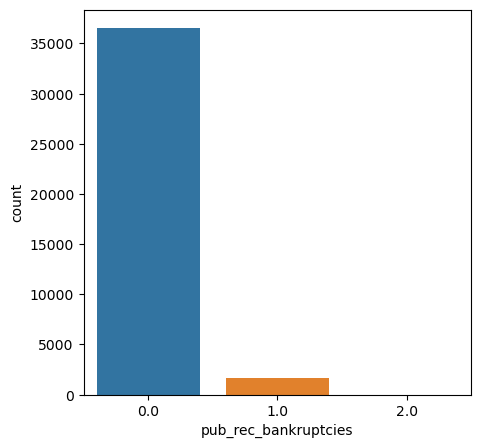

In [114]:
plt.figure(figsize=(5,5))
sns.color_palette("husl", 8)
sns.countplot(data=loan_df_not_null, x='pub_rec_bankruptcies')

### Bivariate Analysis

#### Numerical Feature Analysis

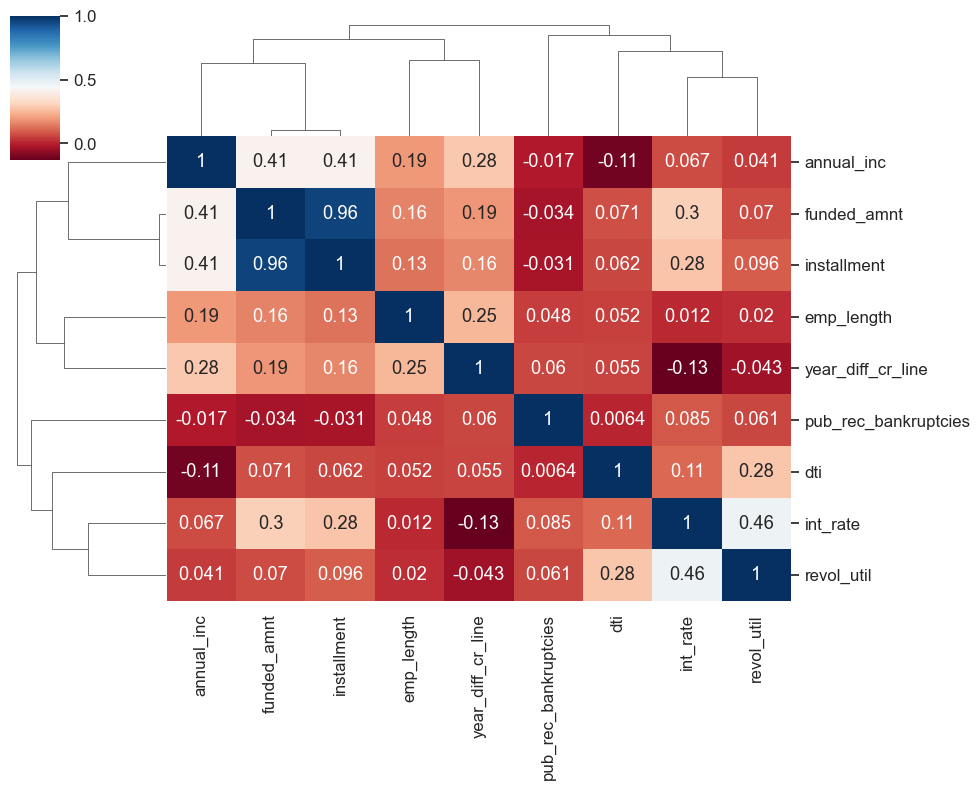

In [203]:
del loan_df_not_null['out_prncp']
del loan_df_not_null['out_prncp_inv']
loan_correlation = loan_df_not_null.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(10, 8),cmap="RdBu")
plt.show()

In [202]:
loan_df_not_null.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'revol_util', 'out_prncp', 'out_prncp_inv', 'pub_rec_bankruptcies',
       'year', 'month', 'year_cr_line', 'month_cr_line', 'year_diff_cr_line',
       'no_debt', 'funded_amnt_bin', 'int_rate_bin', 'annual_inc_bin',
       'dti_bin', 'revol_util_bin', 'year_diff_cr_line_bin'],
      dtype='object')

Observations:

Positive Correlation
1.   Funded amount & Installement are highly correlated as higher the funded amount , instalements to be paid will be higher too.

2. Funded amount is also moderately correlated to annual income & interest rate.

Negative Correlation
3.   dti is - monthly debt paid/monthly income, hence when lesser the income high is the dti ratio. when income increases, dti will decrease. 

4. interest rate is decreases for some who has been taking loan from long time, as int_rate seem to be negatively correlated to years passed from earliest credit line of a user.



<Axes: xlabel='funded_amnt', ylabel='installment'>

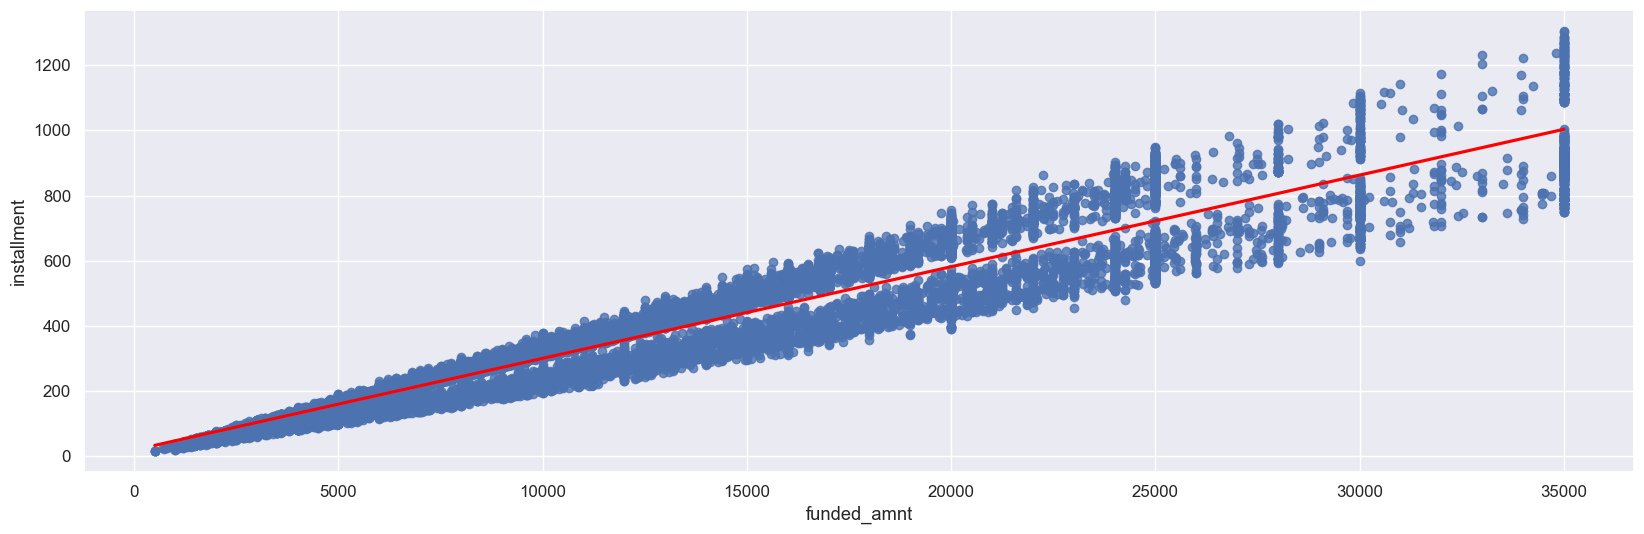

In [116]:
plt.figure(figsize=(20,6))
sns.regplot(data = loan_df_not_null, x = 'funded_amnt', y = 'installment', line_kws={'color':'red'})

Strong correlation between funded amount and installment. Hence installment can be dropped from analysis.

<Axes: xlabel='funded_amnt', ylabel='annual_inc'>

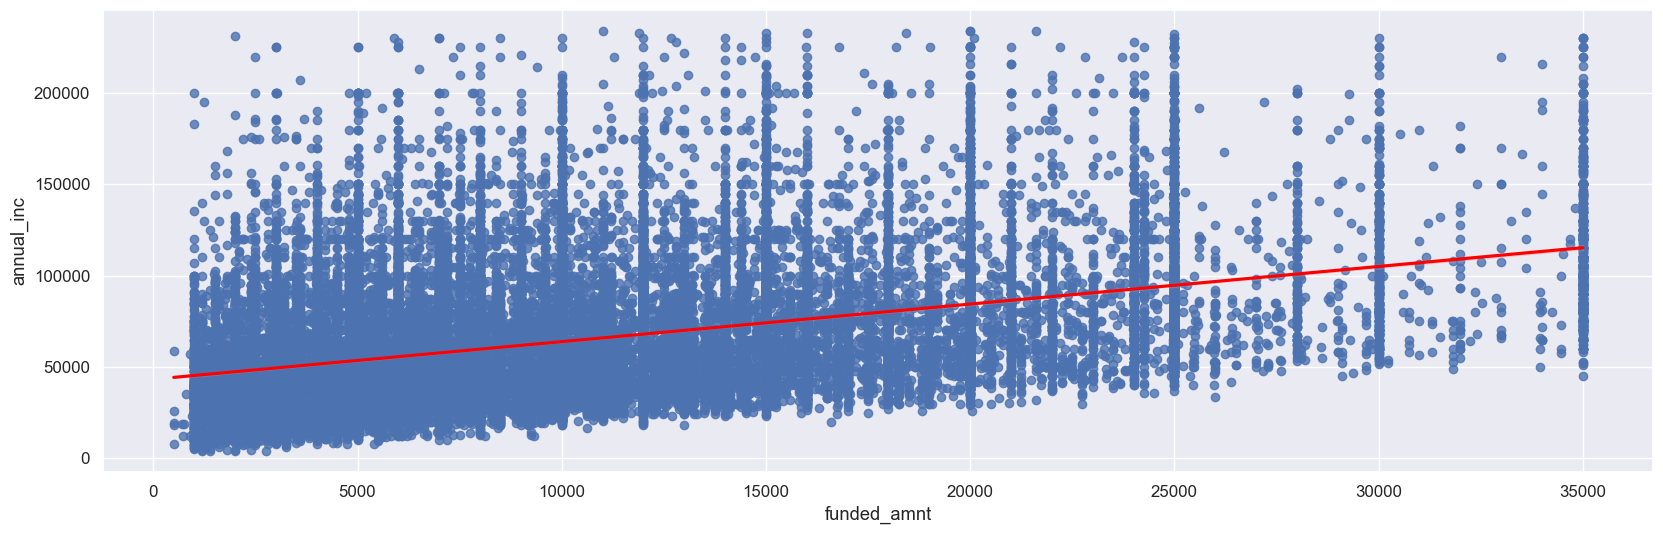

In [117]:
plt.figure(figsize=(20,6))
sns.regplot(data = loan_df_not_null, x = 'funded_amnt', y = 'annual_inc',line_kws={'color':'red'})

Weak, but a positive correlation between funded amount and annual income. 

<Axes: xlabel='funded_amnt', ylabel='int_rate'>

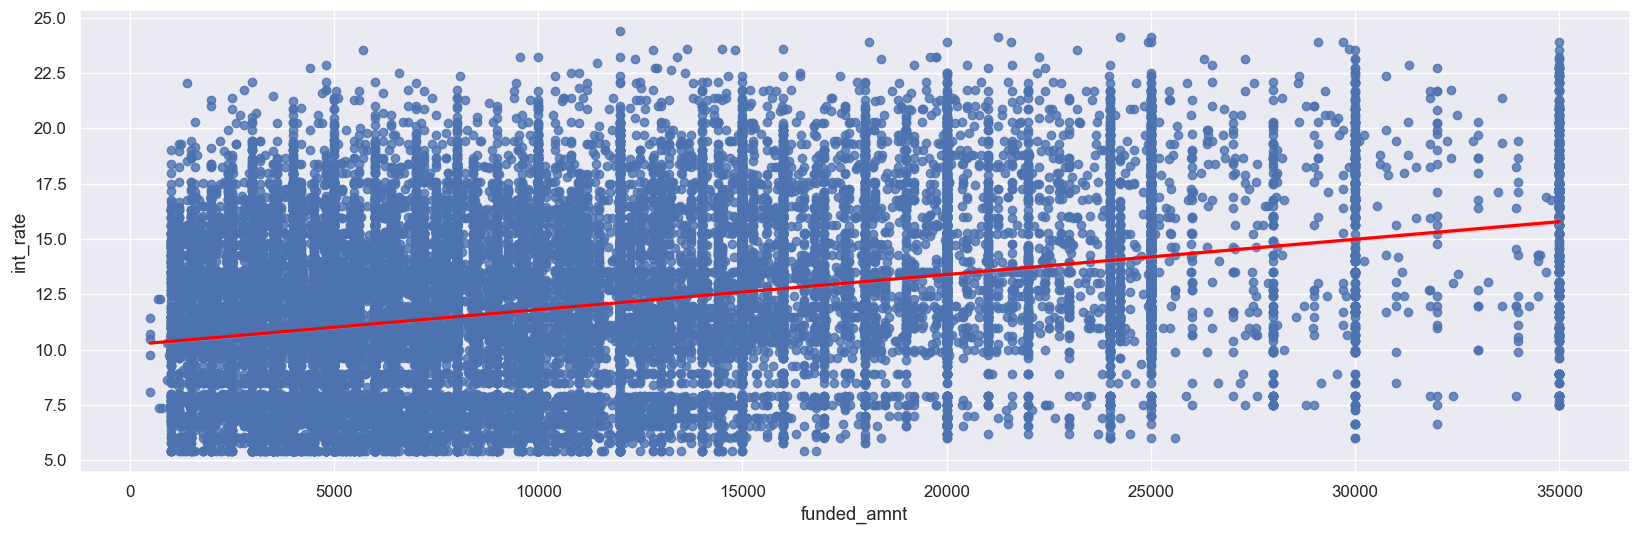

In [118]:
plt.figure(figsize=(20,6))
sns.regplot(data = loan_df_not_null, x = 'funded_amnt', y = 'int_rate',line_kws={'color':'red'})

Weak, but positive correlation btween interest rate and funded amount.

<Axes: xlabel='annual_inc', ylabel='dti'>

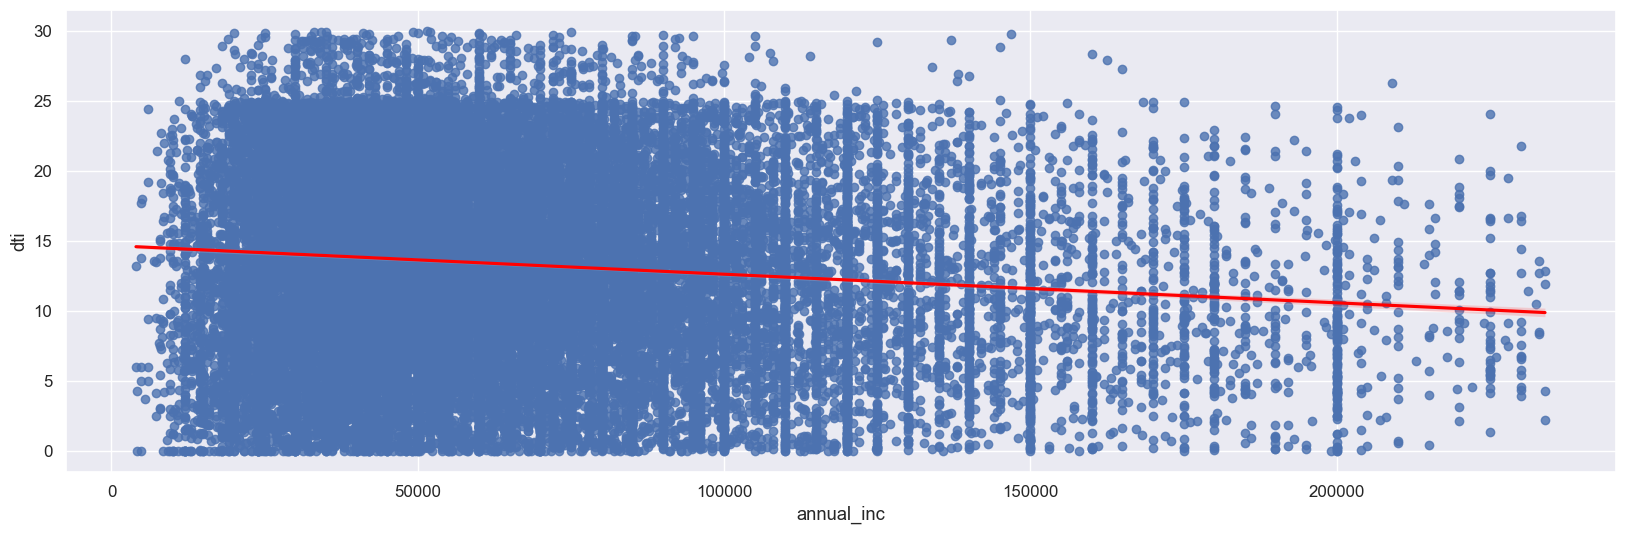

In [119]:
plt.figure(figsize=(20,6))
sns.regplot(data = loan_df_not_null, x = 'annual_inc', y = 'dti',line_kws={'color':'red'})

Annual Income is negatively correlated to dti as dti = loan/income(monthly).

<Axes: xlabel='year_diff_cr_line', ylabel='int_rate'>

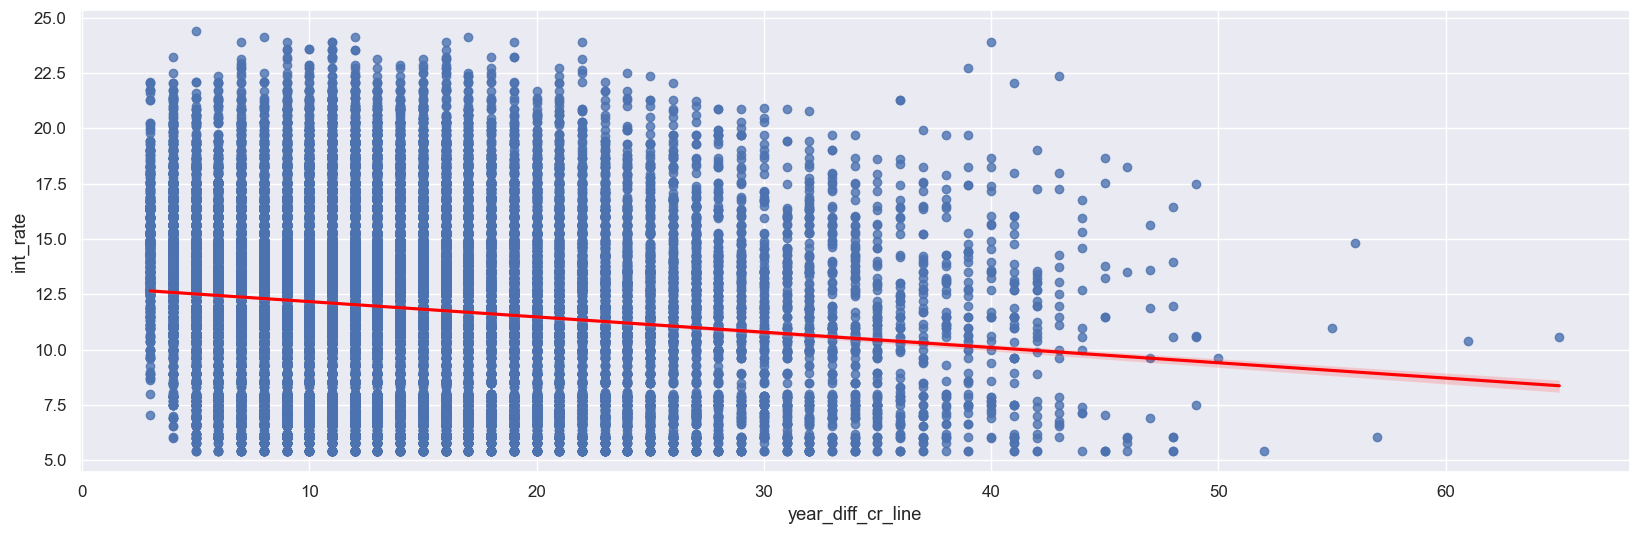

In [120]:
plt.figure(figsize=(20,6))
sns.regplot(data = loan_df_not_null, x = 'year_diff_cr_line', y = 'int_rate',line_kws={'color':'red'})

Negative correlation between year difference since first cr line and interest rate.

<Axes: xlabel='year_diff_cr_line', ylabel='funded_amnt'>

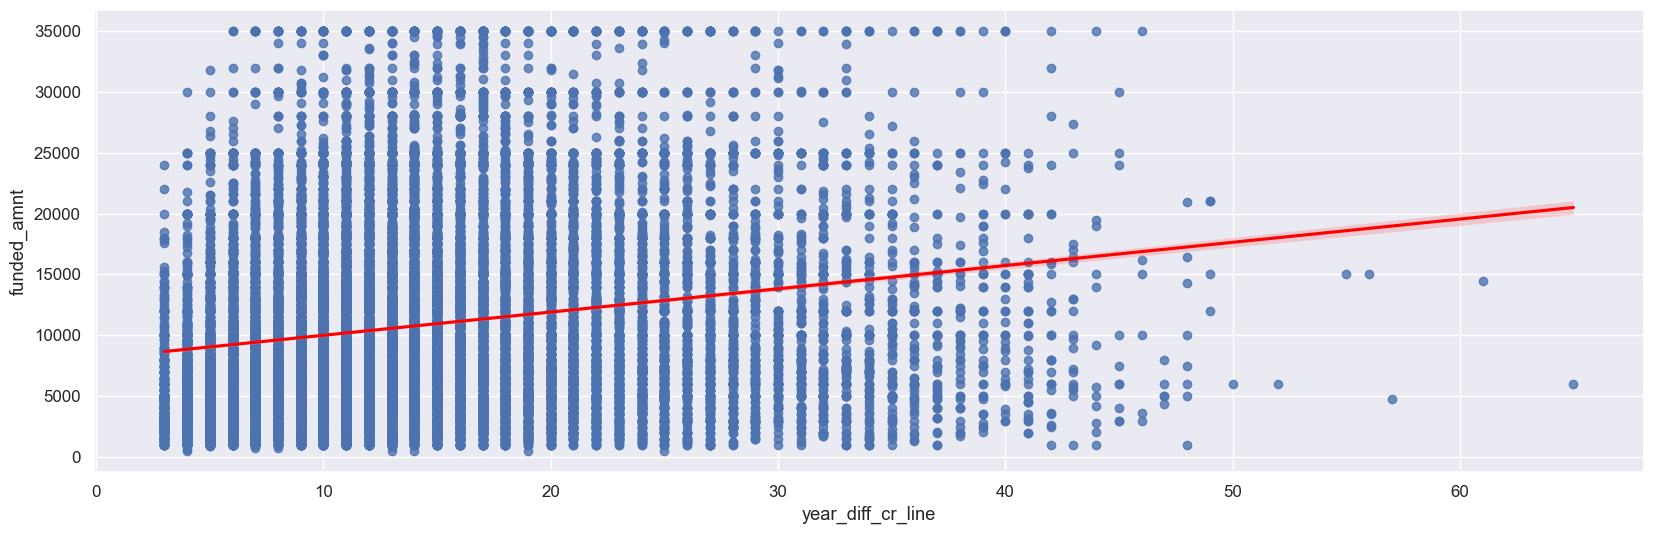

In [121]:
plt.figure(figsize=(20,6))
sns.regplot(data = loan_df_not_null, x = 'year_diff_cr_line', y = 'funded_amnt',line_kws={'color':'red'})

In [163]:
loan_df_not_null['loan_status_binary']=loan_df_not_null['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

In [164]:
loan_df_not_null.loan_status_binary.value_counts()

1    32607
0     5584
Name: loan_status_binary, dtype: int64

Rechecking all selected features for null values.

In [125]:
loan_df_not_null.isna().sum()

funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
revol_util              0
out_prncp               0
out_prncp_inv           0
pub_rec_bankruptcies    0
year                    0
month                   0
year_cr_line            0
month_cr_line           0
year_diff_cr_line       0
no_debt                 0
dtype: int64

Deleting sub_grade as we can analyze grade feature to get required analysis.

In [126]:
# del loan_df_not_null['installment']
del loan_df_not_null['sub_grade']

Dividing features into categorical & numerical columns for bivariate analysis.

In [127]:
num_feature = ['funded_amnt',  'int_rate',
         'annual_inc', 'dti', 'revol_util',  'year_diff_cr_line']
cat_feature = [ 'term',  'grade', 
       'emp_title', 'home_ownership','emp_length',
       'verification_status', 'purpose',
       'addr_state',  'no_debt', 'year', 'month',
       'year_cr_line', 'month_cr_line',
       'loan_status_binary']

#### Binning Numerical features

In [128]:
for column in num_feature:
    print(column)
    new_column = column + '_bin'
    labels = ['(' +
            str(round(np.nanpercentile(loan_df_not_null[column], p * 20),2)) +
             ' - ' +
            str(round(np.nanpercentile(loan_df_not_null[column], (p+1) * 20),2)) +
             ')'
            for p in range(5)]
    print(labels)
    loan_df_not_null[new_column] = pd.qcut(loan_df_not_null[column], q=5, labels=labels)

funded_amnt
['(500.0 - 5000.0)', '(5000.0 - 7500.0)', '(7500.0 - 10775.0)', '(10775.0 - 15675.0)', '(15675.0 - 35000.0)']
int_rate
['(5.42 - 7.9)', '(7.9 - 10.95)', '(10.95 - 12.73)', '(12.73 - 15.21)', '(15.21 - 24.4)']
annual_inc
['(4000.0 - 37000.0)', '(37000.0 - 50000.0)', '(50000.0 - 65000.0)', '(65000.0 - 90000.0)', '(90000.0 - 234000.0)']
dti
['(0.0 - 7.02)', '(7.02 - 11.42)', '(11.42 - 15.38)', '(15.38 - 19.75)', '(19.75 - 29.99)']
revol_util
['(0.0 - 19.8)', '(19.8 - 39.8)', '(39.8 - 58.1)', '(58.1 - 77.2)', '(77.2 - 99.9)']
year_diff_cr_line
['(3.0 - 8.0)', '(8.0 - 11.0)', '(11.0 - 14.0)', '(14.0 - 18.0)', '(18.0 - 65.0)']


#### Categorical Variable Analysis 

In [130]:
cat_feature, num_feature

(['term',
  'grade',
  'emp_title',
  'home_ownership',
  'emp_length',
  'verification_status',
  'purpose',
  'addr_state',
  'no_debt',
  'year',
  'month',
  'year_cr_line',
  'month_cr_line',
  'loan_status_binary'],
 ['funded_amnt',
  'int_rate',
  'annual_inc',
  'dti',
  'revol_util',
  'year_diff_cr_line'])

<Axes: xlabel='emp_length', ylabel='purpose'>

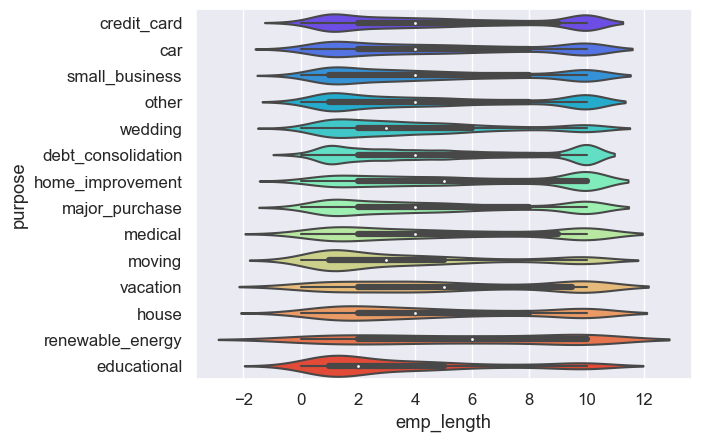

In [131]:
sns.violinplot(y='purpose', x='emp_length', data =loan_df_not_null,palette='rainbow')

Observation  - As observed in Univariate analysis - most loan application are either from beginner of 10+ year experienced. Here we can see that beginners generally take loan for  educational, moving and wedding purpose, but experienced members generally take loan for medical & home improvment.

Lets deep dive and understand the purpose of taking loan by home_ownership

<Axes: xlabel='Percent', ylabel='purpose'>

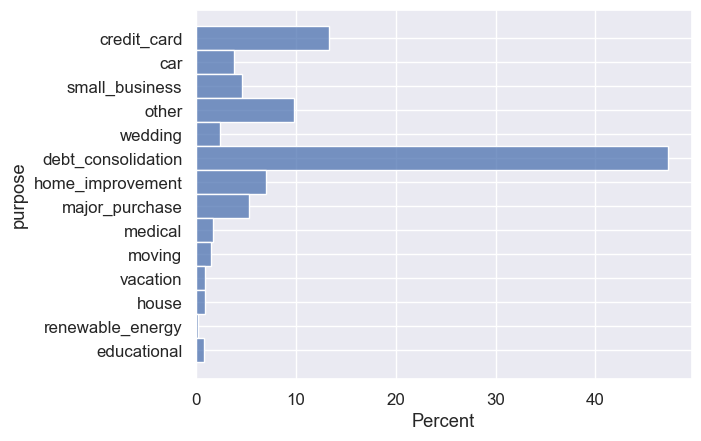

In [132]:
sns.histplot(y='purpose', data =loan_df_not_null[loan_df_not_null['home_ownership']!='OWN'],palette='rainbow', stat = 'percent')


<Axes: xlabel='Percent', ylabel='purpose'>

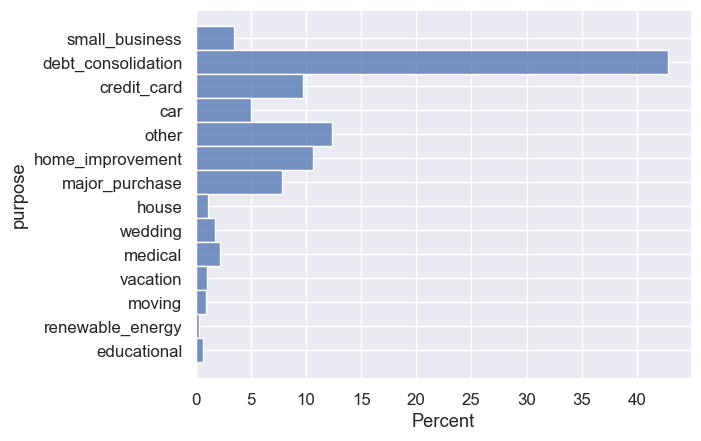

In [133]:
sns.histplot(y='purpose', data =loan_df_not_null[loan_df_not_null['home_ownership']=='OWN'], stat = 'percent',palette='rainbow')

Observation - Although most of the purpose for both category of home owners seems same but we can see More members who has their own house apply for loan for 'major purchase'.

<Axes: xlabel='funded_amnt', ylabel='purpose'>

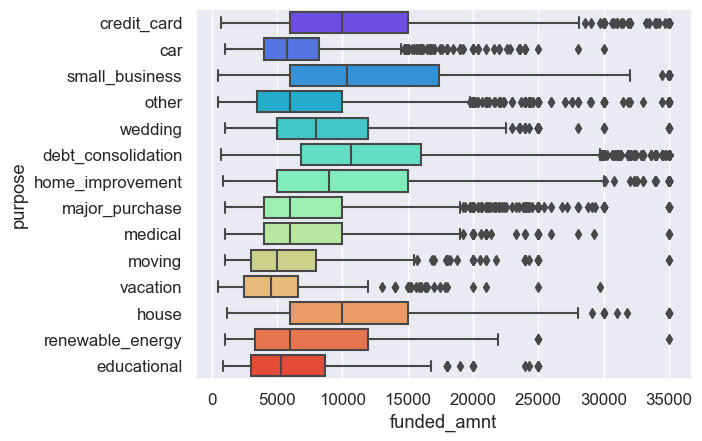

In [134]:
sns.boxplot(y='purpose', x='funded_amnt', data =loan_df_not_null,palette='rainbow')

Observation
1. High loan amount is applied for smmall businesses, house & debt consolidation.
2. Loan amount for car, education & vacation and comparatively smaller than other reasons.

<Axes: xlabel='int_rate', ylabel='purpose'>

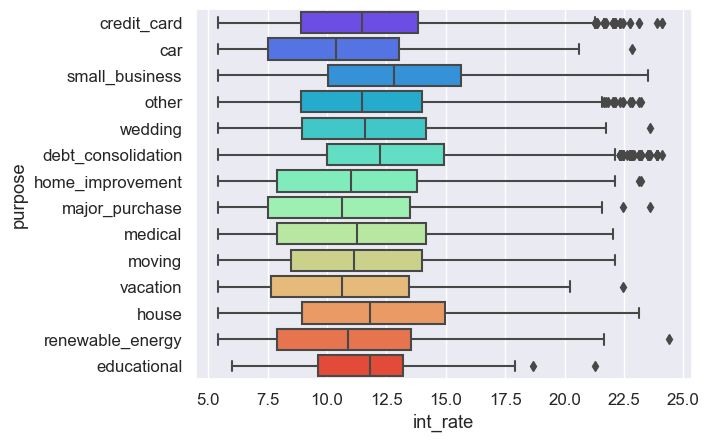

In [136]:
sns.boxplot(y='purpose', x='int_rate', data =loan_df_not_null,palette='rainbow')

Observation - Interest rates for small businesses are generally higher as risk involved in loan repalyment is higher.

<Axes: xlabel='funded_amnt', ylabel='term'>

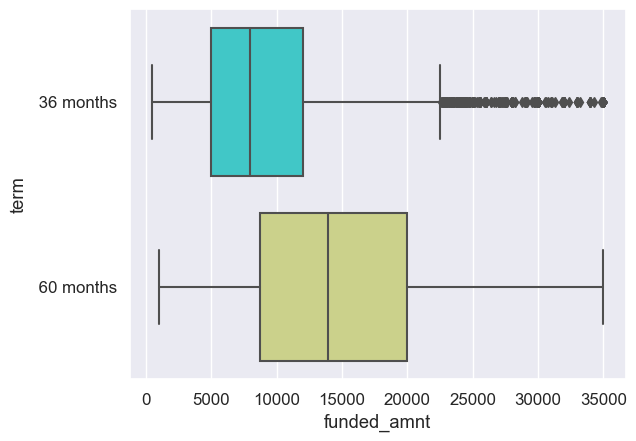

In [137]:
sns.boxplot(y='term', x='funded_amnt', data =loan_df_not_null,palette='rainbow')

Observation - Funded amount is higher for lng term loan. generally if a person applies for big loan they opt for long term payment options.

<AxesSubplot: xlabel='funded_amnt', ylabel='verification_status'>

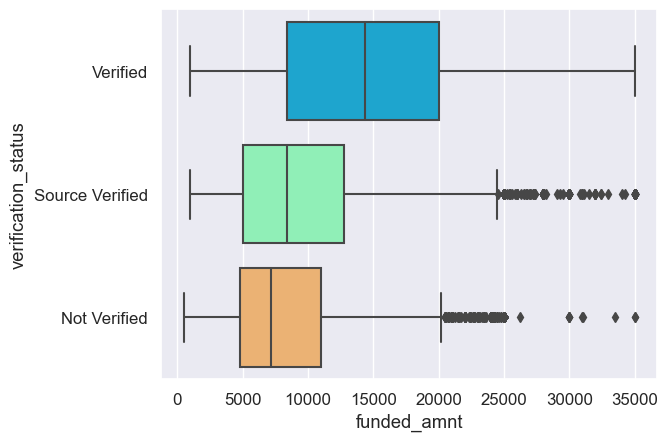

In [190]:
sns.boxplot(y='verification_status', x='funded_amnt', data =loan_df_not_null,palette='rainbow')

Observation - Application whose income has been verified gets bigger loan amount funded compared to someone whose income has not been verified.

<AxesSubplot: xlabel='emp_length', ylabel='home_ownership'>

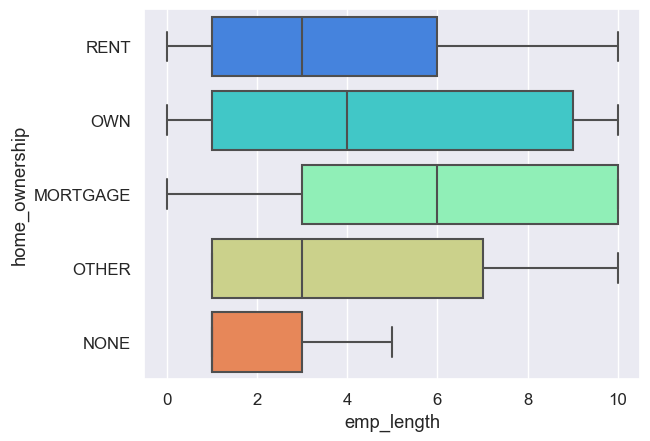

In [191]:
sns.boxplot(y='home_ownership', x='emp_length', data =loan_df_not_null,palette='rainbow')

Observation - Most of the applicant lives in rent till 6 years of experience. Applicants who owns their own house, we can see its graph is left skewed, which means their is high chance someone owns house only after significant year of experience.

<Axes: xlabel='int_rate', ylabel='grade'>

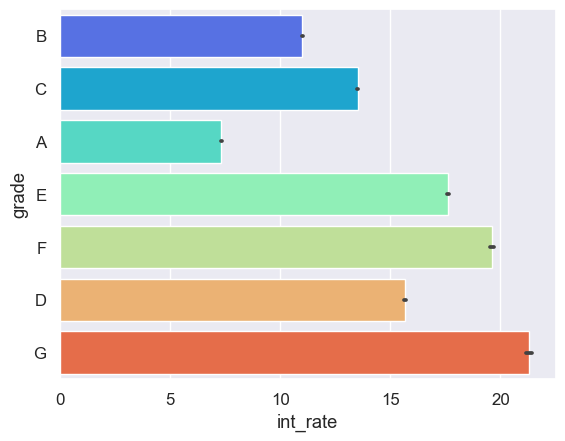

In [142]:
sns.barplot(y='grade', x='int_rate', data =loan_df_not_null,palette='rainbow')

Observation - Interest Rates are higher for grade D,E,F,G as compared to grade A,B,C. We also observed more loan applicants are from A, B & C Grades.

#### Variable v/s Target Variable("loan_status")

In [146]:
for column in loan_df_not_null.columns:
    if ('bin' in column) or (column in cat_feature):
        if column=='emp_title':
            continue
        else:
            print(column)
    #Calculating chargedoff proportion
#     else:
#         temp = loan_df_not_null.groupby([column, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#         temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
#         temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

#         print(column + ' v/s ChargedOff Proportion')
#         fig, ax1 = plt.subplots(figsize=(15, 5))
#         ax1=sns.barplot(x=column, y='Chargedoff_Proportion', data=temp)
#         plt.show()

term
grade
emp_length
home_ownership
verification_status
purpose
addr_state
year
month
year_cr_line
month_cr_line
no_debt
funded_amnt_bin
int_rate_bin
annual_inc_bin
dti_bin
revol_util_bin
year_diff_cr_line_bin


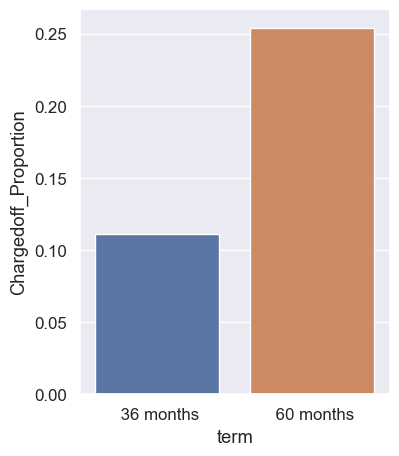

In [163]:
temp = loan_df_not_null.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(4, 5))
ax1=sns.barplot(x='term', y='Chargedoff_Proportion', data=temp)
plt.show()

Observation - Long Term loan has higher chances og getting charged off. We have also observed that funded amount is significantly higher for long term loans as well.

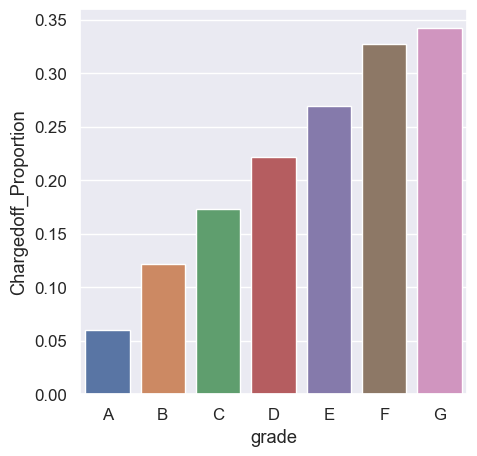

In [165]:
temp = loan_df_not_null.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(5, 5))
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=temp)
plt.show()

Observation - Higher chance of ChargedOff from applicant of Grade E, F & G, as we noticed earlier, their interest rate are also higher when compared to other Grades.

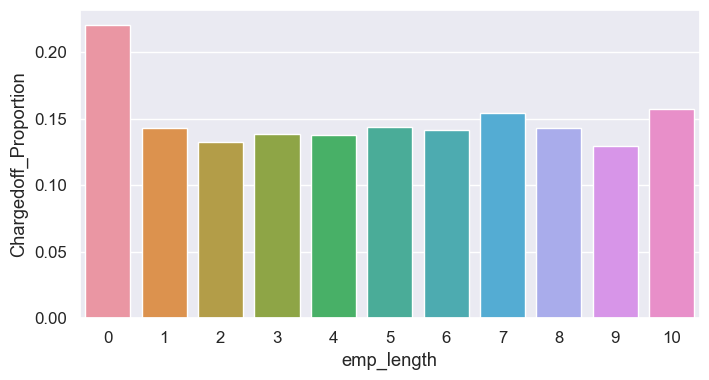

In [168]:
temp = loan_df_not_null.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=temp)
plt.show()

Observation - Applicant just starting their career has higher rate of ChargedOff cases. as they might be low on savings.

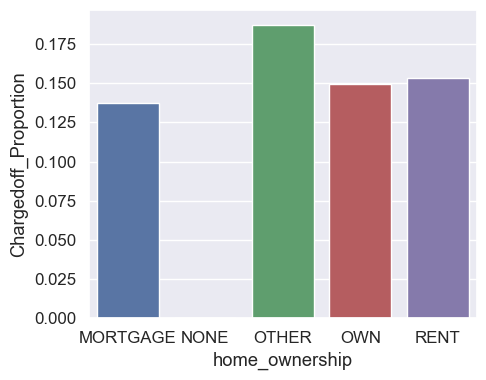

In [170]:
temp = loan_df_not_null.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(5, 4))
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=temp)
plt.show()

Observation - People who don't share their home_ownership status are more likely to charged off.


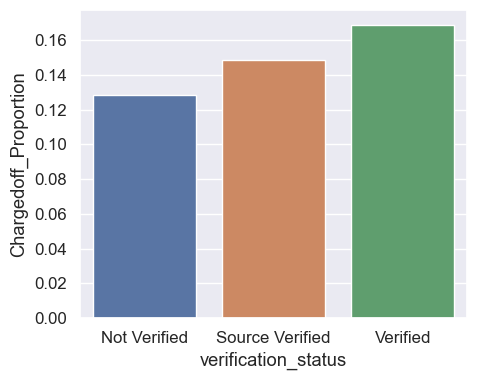

In [171]:
temp = loan_df_not_null.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(5, 4))
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=temp)
plt.show()

Observation -Verification Status of income does not shows any significant difference in ChargedOff rate.

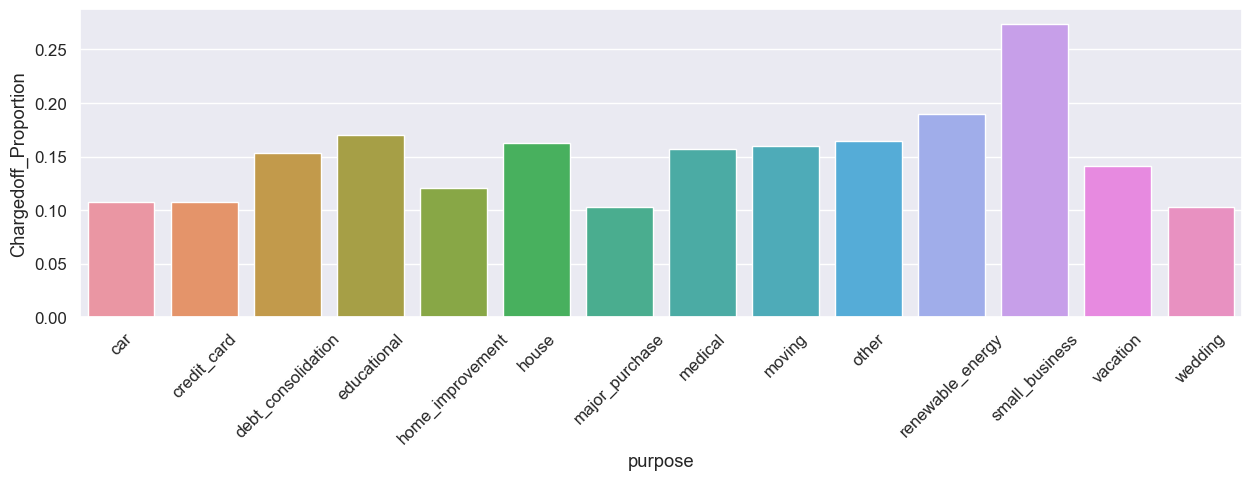

In [174]:
temp = loan_df_not_null.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(15, 4))
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=temp)
plt.xticks(rotation=45)
plt.show()

Observation - Small business being the riskiest purpose, has highest rate(>25%) of Charged Off.

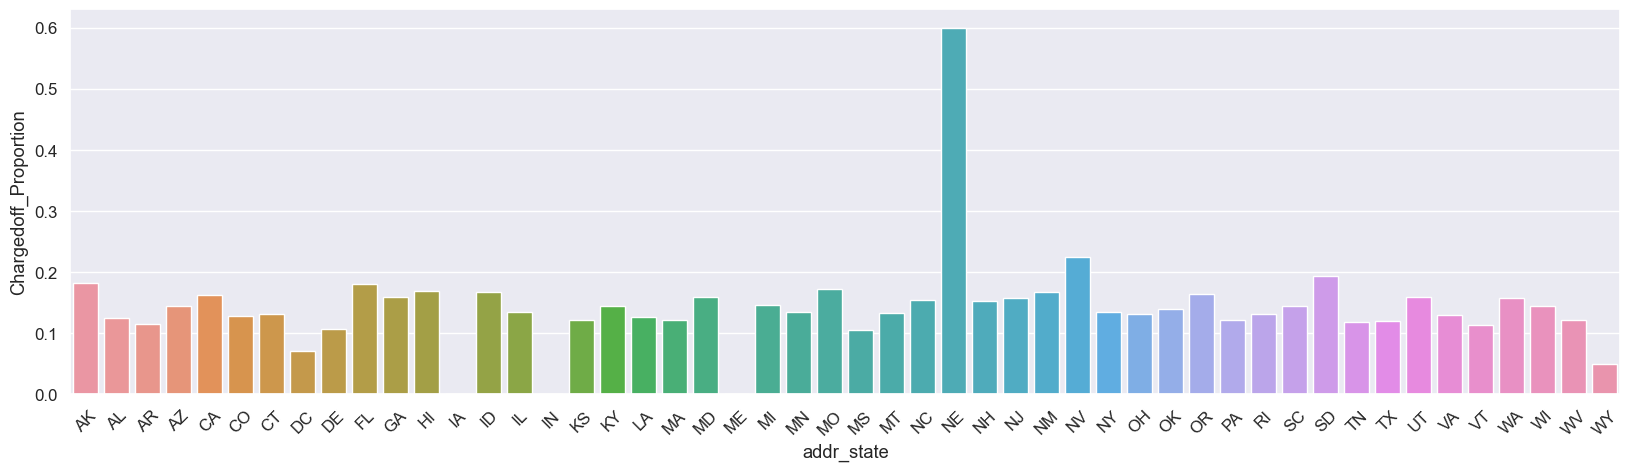

In [177]:
temp = loan_df_not_null.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=temp)
plt.xticks(rotation=45)
plt.show()

Observation - Applicants from NE has 6% ChargedOff rate which is higher than applicants from any other state, and has low Charged Off rate below 2%

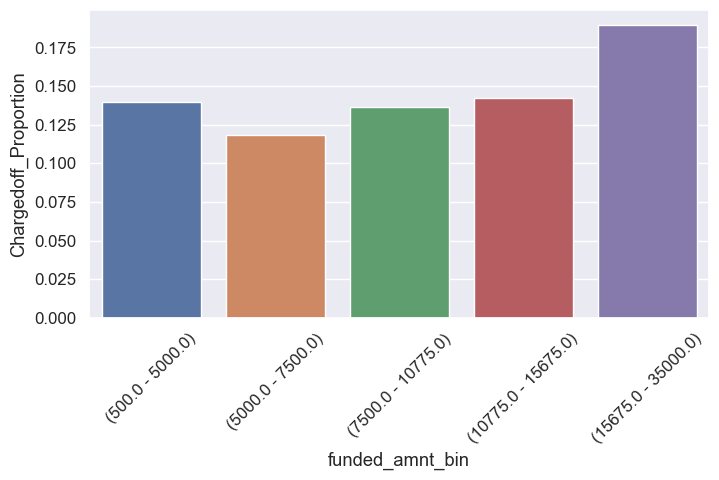

In [185]:
temp = loan_df_not_null.groupby(['funded_amnt_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1=sns.barplot(x='funded_amnt_bin', y='Chargedoff_Proportion', data=temp)
plt.xticks(rotation=45)
plt.show()

Observation - Charged Off rate is slightly high for applicant with higher funded amount.

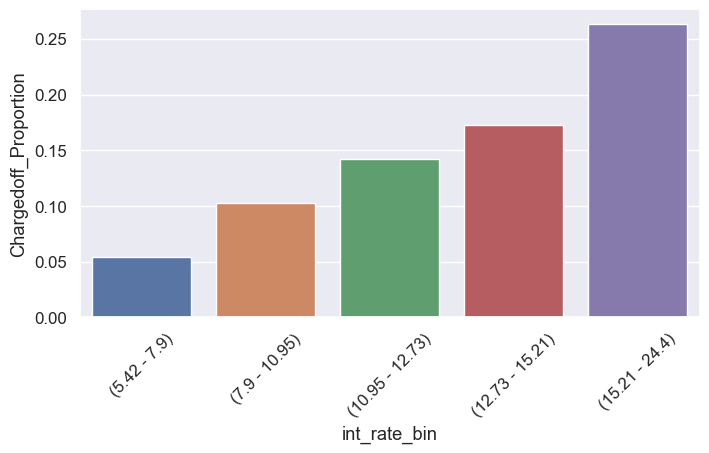

In [189]:
temp = loan_df_not_null.groupby(['int_rate_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1=sns.barplot(x='int_rate_bin', y='Chargedoff_Proportion', data=temp)
plt.xticks(rotation=45)
plt.show()

Observation - Charged Off rate shows exponential increase with increase in interest rate.

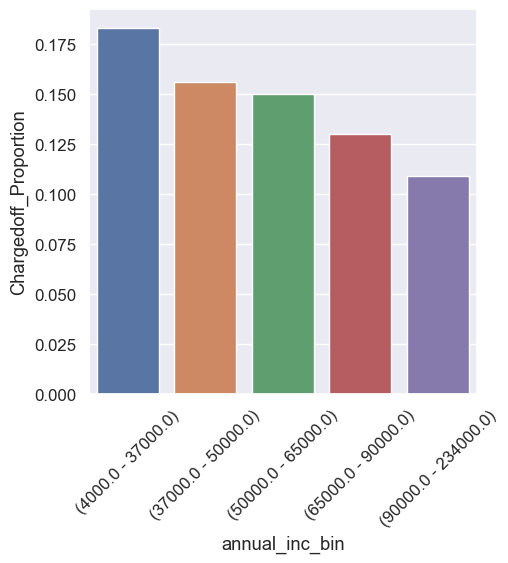

In [191]:
temp = loan_df_not_null.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(5, 5))
ax1=sns.barplot(x='annual_inc_bin', y='Chargedoff_Proportion', data=temp)
plt.xticks(rotation=45)
plt.show()

Observation - Charged Off rate is higher for applicant having low annual income and shows linear decline with increase in income.

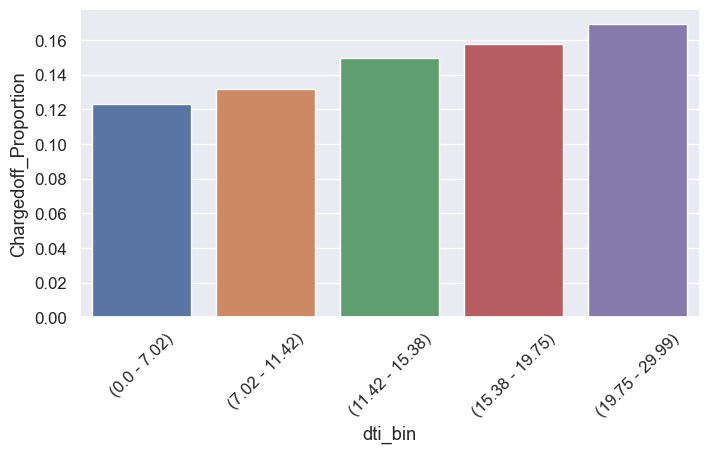

In [193]:
temp = loan_df_not_null.groupby(['dti_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1=sns.barplot(x='dti_bin', y='Chargedoff_Proportion', data=temp)
plt.xticks(rotation=45)
plt.show()

Observation - higher dti signifies that applicant has more debt amount relative to its income hence higher dti has slighly high Charged Off rate.

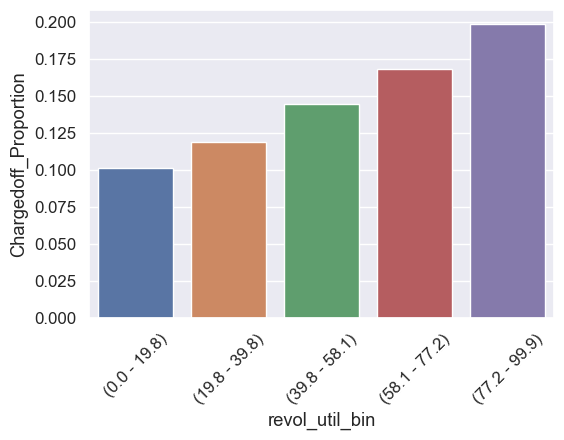

In [196]:
temp = loan_df_not_null.groupby(['revol_util_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(6, 4))
ax1=sns.barplot(x='revol_util_bin', y='Chargedoff_Proportion', data=temp)
plt.xticks(rotation=45)
plt.show()

Observation - Applicant who has consumed 70-100% of their credit limit are more likely to chargeoff as credit limits are set according to applicants potential to loan back.

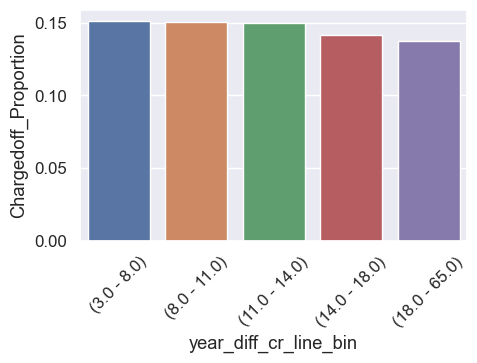

In [199]:
temp = loan_df_not_null.groupby(['year_diff_cr_line_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
temp['Total'] = temp['Charged Off']  + temp['Fully Paid'] 
temp['Chargedoff_Proportion'] = temp['Charged Off'] / temp['Total']

fig, ax1 = plt.subplots(figsize=(5, 3))
ax1=sns.barplot(x='year_diff_cr_line_bin', y='Chargedoff_Proportion', data=temp)
plt.xticks(rotation=45)
plt.show()

Observation - year passed from the earliest credit line has no significant effect on Charged Off rate/